## Abalone
To make our lives easier we can divide the age of the abalone into groups. The question we need to answer is what would be a threshold for age that would make sense using. Apart from the age itself we are provided with the information whether a abalone is an infant by tehe sex feature which differenciates between female, male and infrant abalone. We could use this indicator to create a first class we call infant. All other abalone would be adults.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

column_names = [
    "sex",
    "length",
    "diameter",
    "height",
    "whole_weight",
    "shucked_weight",
    "viscera_weight",
    "shell_weight",
    "rings"
] 

df = pd.read_csv("abalone.data", names=column_names)

infants = df[df["sex"] == "I"]
adults =  df[df["sex"] != "I"]

print(f"infants description: \n {infants.describe()}")
print(f"adults description: \n {adults.describe()}")


infants description: 
             length     diameter       height  whole_weight  shucked_weight  \
count  1342.000000  1342.000000  1342.000000   1342.000000     1342.000000   
mean      0.427746     0.326494     0.107996      0.431363        0.191035   
std       0.108858     0.088109     0.031995      0.286275        0.128405   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.360000     0.270000     0.085000      0.205500        0.090000   
50%       0.435000     0.335000     0.110000      0.384000        0.169750   
75%       0.510000     0.390000     0.130000      0.599375        0.270375   
max       0.725000     0.550000     0.220000      2.049500        0.773500   

       viscera_weight  shell_weight        rings  
count     1342.000000   1342.000000  1342.000000  
mean         0.092010      0.128182     7.890462  
std          0.062536      0.084927     2.511554  
min          0.000500      0.001500     1.000000  
25%          0.0425

While the amount of rings for infants in gnerally smaller than the amount of rings of the adults there is quite a heavy overlap. So this might not be the most approprate way to split age into broader categories. 

infant distribution: 
 rings
1       1
2       1
3      12
4      51
5     100
6     216
7     267
8     274
9     173
10     92
11     62
12     21
13     24
14     14
15     10
16      7
17      7
18      5
19      2
20      2
21      1
Name: count, dtype: int64
adult distribution: 
 rings
3       3
4       6
5      15
6      43
7     124
8     294
9     516
10    542
11    425
12    246
13    179
14    112
15     93
16     60
17     51
18     37
19     30
20     24
21     13
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64


(array([  24.,  461., 1058.,  850.,  205.,  148.,   67.,   15.,    4.,
           3.]),
 array([ 3. ,  5.6,  8.2, 10.8, 13.4, 16. , 18.6, 21.2, 23.8, 26.4, 29. ]),
 <BarContainer object of 10 artists>)

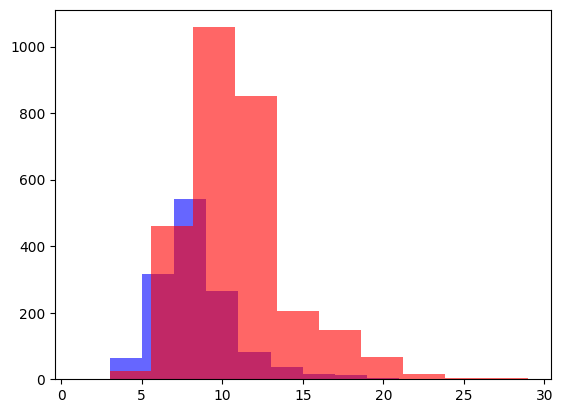

In [39]:
infant_dist = infants["rings"].value_counts().sort_index()
adult_dist = adults["rings"].value_counts().sort_index()

print(f"infant distribution: \n {infant_dist}")
print(f"adult distribution: \n {adult_dist}")
plt.hist(infants["rings"], color="blue", alpha = 0.6)
plt.hist(adults["rings"], color="red", alpha = 0.6)

Initially this overlap is a little confusing. I would have assumed that abalone became sexualy mature around the same age.
We can find the reason for this overlap in the original paper. Sexual maurity seems to be more related to size than to age "Analysis of residuals showed that fecundity is clearly size-related, with a poor relationship
between age and fecundity."

stunted blacklip abalone (Haliotis rubra)

https://www.researchgate.net/profile/Warwick-Nash/publication/287546509_7he_Population_Biology_of_Abalone_Haliotis_species_in_Tasmania_I_Blacklip_Abalone_H_rubra_from_the_North_Coast_and_Islands_of_Bass_Strait/links/5d949460458515202b7bf592/7he-Population-Biology-of-Abalone-Haliotis-species-in-Tasmania-I-Blacklip-Abalone-H-rubra-from-the-North-Coast-and-Islands-of-Bass-Strait.pdf

Abalone growth varies with seasons, food availability, population density, temperature, local hydrography of the reef and stress (https://www.sciencedirect.com/science/article/abs/pii/S1385110110001218)

Since most of the feature are growth realted this is not a trivial task. Especially given the fact that the abalone were harvested in multiple areas with differing conditions "Abalone populations were surveyed in five areas" The original paper goes more into detail of how growth varied in the different ares


Without expert knowledge it is difficult to specify a meaningful threshold. Therefore we will focus on the thresold suggested by    David Clark, Zoltan Schreter, Anthony Adams "A Quantitative Comparison of
   Dystal and Backpropagation", submitted to the Australian Conference on
   Neural Networks (ACNN'96). Data set treated as a 3-category classification
   problem (grouping ring classes 1-8, 9 and 10, and 11 on).

this leads to a fairly balanced class distribution

age_class
old       1447
young     1407
medium    1323
Name: count, dtype: int64


<Axes: xlabel='age_class'>

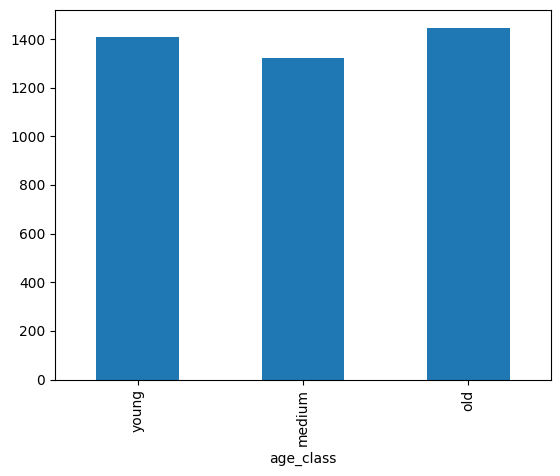

In [40]:
df['age_class'] = df["rings"].apply(lambda rings: "young" if rings <=8 else ("medium" if rings <= 10 else "old"))
print(df['age_class'].value_counts())
counts = df['age_class'].value_counts()[['young','medium','old']]
counts.plot(kind='bar')



        Name            Data Type       Meas.   Description                        
        ----            ---------       -----   -----------
        Sex             nominal                 M, F, and I (infant)            Nominal
        Length          continuous      mm      Longest shell measurement       ratio
        Diameter        continuous      mm      perpendicular to length         ratio
        Height          continuous      mm      with meat in shell              ratio   
        Whole weight    continuous      grams   whole abalone                   ratio  
        Shucked weight  continuous      grams   weight of meat                  ratio
        Viscera weight  continuous      grams   gut weight (after bleeding)     ratio 
        Shell weight    continuous      grams   after being dried               ratio   
        Rings           integer                 +1.5 gives the age in years     ratio

In [41]:
#no missing values
print(df.isnull().sum())

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
age_class         0
dtype: int64


In [42]:
#why are there some instances were individual parts are heavier than the whole weight?? 
#especially after drying and bleeding I would assume the opposite
weight_diff = df["whole_weight"] - df["shucked_weight"] - df["viscera_weight"] - df["shell_weight"]
weight_diff[weight_diff<0]

42     -0.0050
43     -0.0105
44     -0.0030
45     -0.0045
46     -0.0805
         ...  
3963   -0.0025
3969   -0.0330
3996   -0.3025
4046   -0.0375
4143   -0.0135
Length: 154, dtype: float64

In [43]:
#two instances with height of 0. Is this a missing value or just tiny abalone?
zero_height = df[df["height"] == 0]
print(len(zero_height))

2


In [44]:
#one hot encode sex
df = pd.get_dummies(df, columns=['sex', ])
df.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age_class,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,old,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,young,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,medium,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,medium,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,young,False,True,False


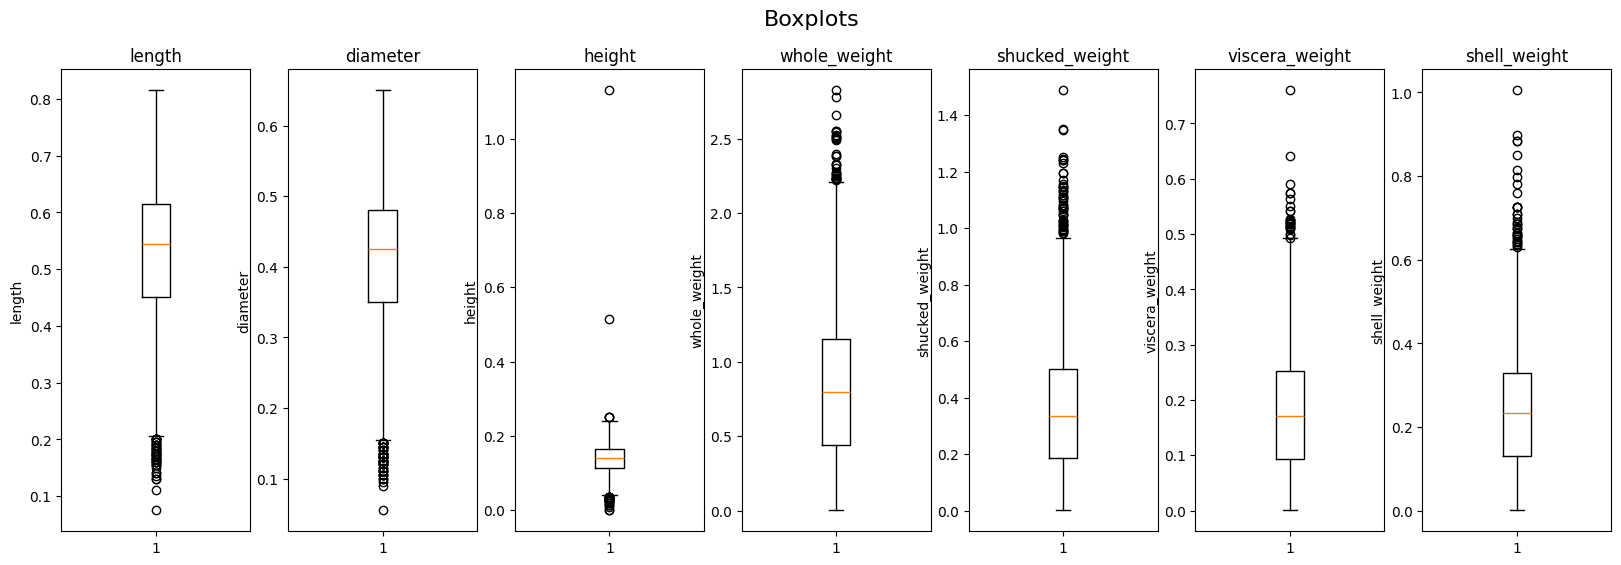

In [45]:
df_plot = df.select_dtypes(include='number').drop(columns=["rings"])
fig, axs = plt.subplots(1, len(df_plot.columns), figsize=(20, 6))
fig.suptitle("Boxplots", fontsize=16)


for i, feature in enumerate(df_plot):
    axs[i].boxplot(df[feature])
    axs[i].set_title(feature)
    axs[i].set_ylabel(feature)
    axs[i].set_xlabel('')  

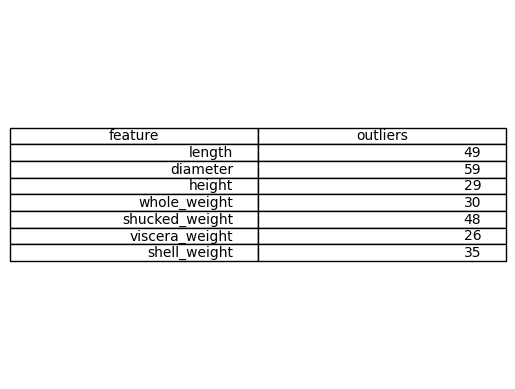

In [15]:
row_headers = []
table_values = []
outliers_df = pd.DataFrame(columns=["feature", "outliers"])

for feature in df_plot.columns:
    data = df_plot[feature]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    feat_outliers = pd.Series({"feature": feature, "outliers": len(outliers)})
    outliers_df = pd.concat([
                outliers_df, 
                pd.DataFrame([feat_outliers], columns=feat_outliers.index)]
           ).reset_index(drop=True)

fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
plt.table(cellText=outliers_df.values, colLabels=outliers_df.columns, loc='center')




In [29]:
TODO
What shall we do with these otuliers?
what to do about skewed data?

Object `otuliers` not found.


array([[<Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'diameter'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'whole_weight'}>],
       [<Axes: title={'center': 'shucked_weight'}>,
        <Axes: title={'center': 'viscera_weight'}>,
        <Axes: title={'center': 'shell_weight'}>,
        <Axes: title={'center': 'rings'}>]], dtype=object)

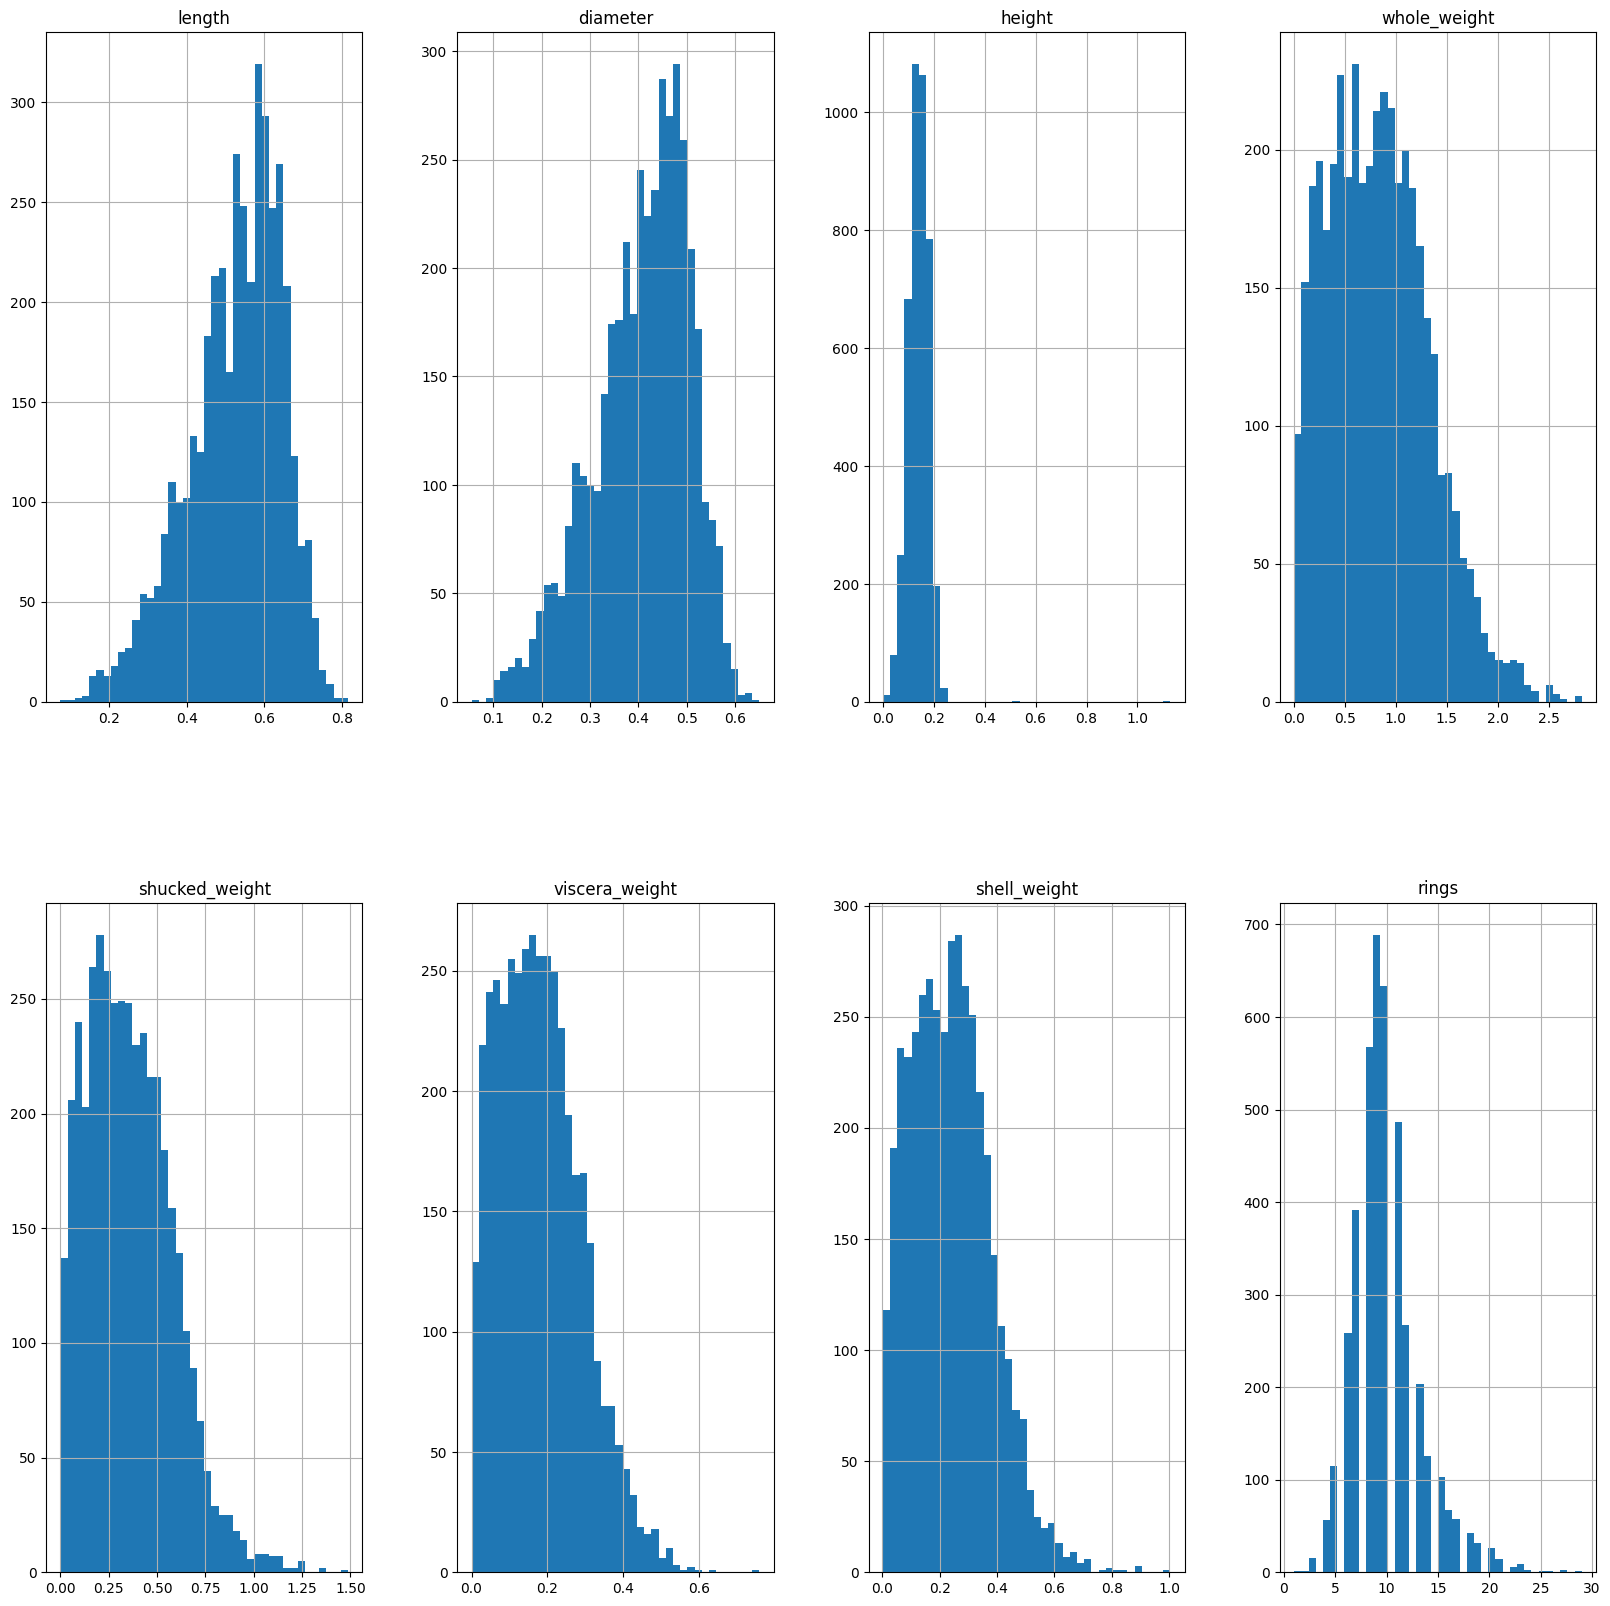

In [35]:
df.hist(figsize=(20,20), grid = True, layout = (2,4), bins=40)

In [42]:
df_plt.skew()

length           -0.639873
diameter         -0.609198
height            3.128817
whole_weight      0.530959
shucked_weight    0.719098
viscera_weight    0.591852
shell_weight      0.620927
dtype: float64

If skewness is approximately 0, your data is normally distributed. If skewness is between 0 and +1 (or -1), your data is moderately skewed. If it's above +1 (or below -1), you might be looking at significantly skewed data

<Axes: >

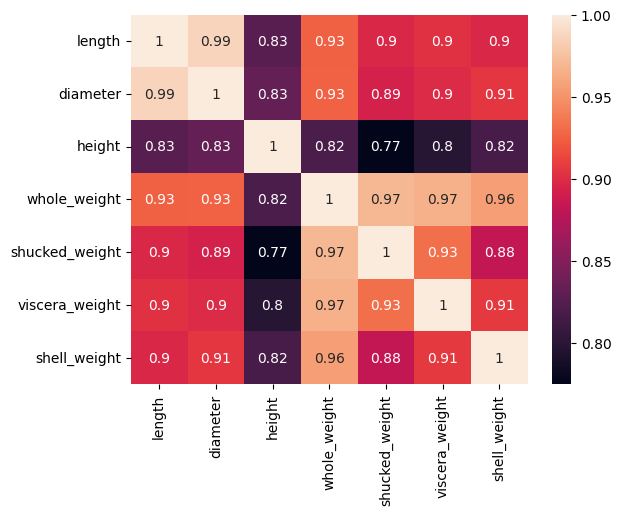

In [47]:
import seaborn as sns
sns.heatmap(df_plt.corr(method='pearson', min_periods=1), annot=True,)

In [ ]:
PCA